# Introduction

**Tujuan**
* Meningkatkan kecepatan dan efektivitas dalam proses evaluasi promosi karyawan 

**Objektif**
* Membuat model machine learning yang dapat menentukan apakah seorang karyawan layak dipromosikan atau tidak


Dataset : [HR_Analytics_Classification | Kaggle](https://www.kaggle.com/bhrt97/hr-analytics-classification)

## Roadmap
1. Exploratory Data Analysis
2. Data Overview & Preprocessing
3. Modelling
4. Summary and Recommedation

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('hr-data-final.csv')
df.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0


In [3]:
df['is_promoted'].value_counts()/df.shape[0]*100

0    91.482995
1     8.517005
Name: is_promoted, dtype: float64

1. Persentasi dari employee yang tidak mendapatkan promosi adalah 91.48%
2. Persentasi dari employee yang  mendapatkan promosi adalah 8.52%

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           54808 non-null  int64  
 1   department            54808 non-null  object 
 2   region                54808 non-null  object 
 3   education             52399 non-null  object 
 4   gender                54808 non-null  object 
 5   recruitment_channel   54808 non-null  object 
 6   no_of_trainings       54808 non-null  int64  
 7   age                   54808 non-null  int64  
 8   previous_year_rating  50684 non-null  float64
 9   length_of_service     54808 non-null  int64  
 10  KPIs_met >80%         54808 non-null  int64  
 11  awards_won?           54808 non-null  int64  
 12  avg_training_score    54808 non-null  int64  
 13  is_promoted           54808 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.9+ MB


**Conclusion**
* Dataframe terdapat 14 kolom
* Dataframe dengan total baris 54808
* Total data kategorikal 5 kolom
* Total data numerikal 9 kolom
* Terdapat 2 kolom memiliki missing value `education` dan `previous_year_rating`
* `is_promoted` adalah target dalam dataset ini

## Exploratory Data Analysis

In [5]:
df.describe()

,employee_id,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
count,54808.000000,54808.000000,54808.000000,50684.000000,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000
mean,39195.830627,1.253011,34.803915,3.329256,5.865512,0.351974,0.023172,63.386750,0.085170
std,22586.581449,0.609264,7.660169,1.259993,4.265094,0.477590,0.150450,13.371559,0.279137
min,1.000000,1.000000,20.000000,1.000000,1.000000,0.000000,0.000000,39.000000,0.000000
25%,19669.750000,1.000000,29.000000,3.000000,3.000000,0.000000,0.000000,51.000000,0.000000
50%,39225.500000,1.000000,33.000000,3.000000,5.000000,0.000000,0.000000,60.000000,0.000000
75%,58730.500000,1.000000,39.000000,4.000000,7.000000,1.000000,0.000000,76.000000,0.000000
max,78298.000000,10.000000,60.000000,5.000000,37.000000,1.000000,1.000000,99.000000,1.000000


In [6]:
df.describe(exclude = 'number')

,department,region,education,gender,recruitment_channel
count,54808,54808,52399,54808,54808
unique,9,34,3,2,3
top,Sales & Marketing,region_2,Bachelor's,m,other
freq,16840,12343,36669,38496,30446


**Categorical Data**
* Data mayoritas in `gender` adalah male dengan frekuensi 38496
* Data mayoritas in `department` adalah Sales & Marketing dengan frekuensi 16840
* Data mayoritas in `education` adalah Bachelor's dengan frekuensi 36669
* Data mayoritas in `region` adalah region_2 dengan frekuensi 12343
* Data mayoritas in `recruitment_channel` adalah other dengan frekuensi 30446

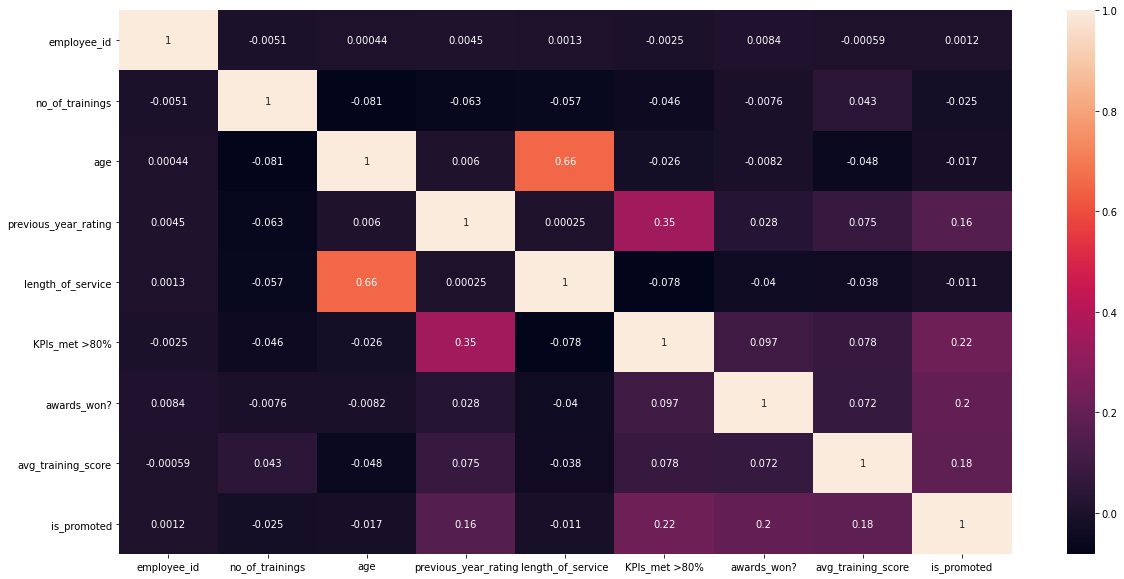

In [7]:
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(),annot= True)

In [8]:
df_unique = df.nunique().reset_index()
df_unique.columns = ['feature', 'unique value']
df_unique = df_unique.sort_values('unique value', ascending=False).reset_index(drop=True)
df_unique

,feature,unique value
0,employee_id,54808
1,avg_training_score,61
2,age,41
3,length_of_service,35
4,region,34
5,no_of_trainings,10
6,department,9
7,previous_year_rating,5
8,education,3
9,recruitment_channel,3


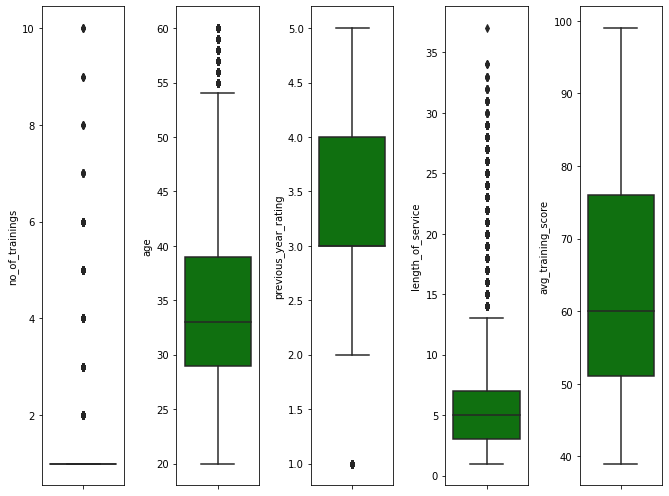

In [9]:
# Melihat distribusi data menggunakan boxplot
features = ['no_of_trainings','age','previous_year_rating','length_of_service','avg_training_score']
plt.figure(figsize=(15, 7))

for i in range(0, len(features)):
    plt.subplot(1, 8, i+1)
    sns.boxplot(y=df[features[i]],color='green',orient='v')
    plt.tight_layout()

##### Probabilitas di promosikan berdasrarkan  `awards_won?`

In [10]:
df_awards = pd.pivot_table(df,
                    index = ['awards_won?'],
                    columns = ['is_promoted'],
                    aggfunc = {'is_promoted' : ['count']}).reset_index()
df_awards.columns = ['awards_won', 'not_promoted', 'promoted']
df_awards['total'] = df_awards['not_promoted']+df_awards['promoted']
df_awards['probability'] = round((df_awards['promoted']/df_awards['total'])*100,2)
df_awards = df_awards.sort_values(['probability'], ascending=False)
df_awards

,awards_won,not_promoted,promoted,total,probability
1,1,711,559,1270,44.02
0,0,49429,4109,53538,7.67


<function matplotlib.pyplot.tight_layout(pad=1.08, h_pad=None, w_pad=None, rect=None)>

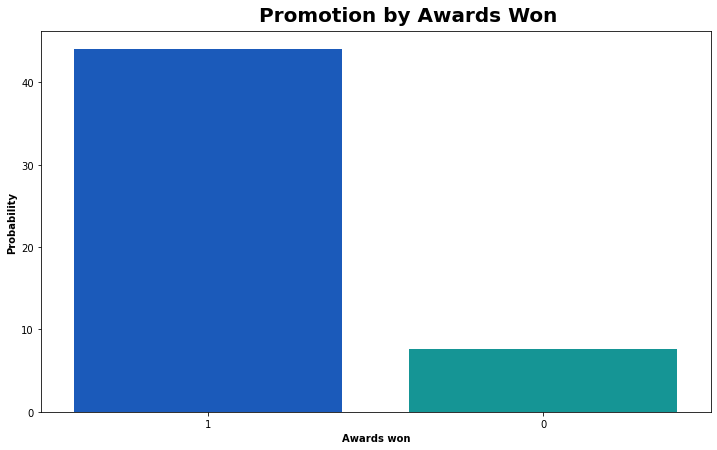

In [11]:
fig, (ax1) = plt.subplots(figsize=(12,7))
sns.barplot(x='awards_won', y='probability', 
                data=df_awards,ax=ax1,palette='winter',
               order=df_awards.sort_values('probability',ascending = False).awards_won)

title = 'Promotion by Awards Won'
plt.xlabel('Awards won', fontsize = 10, weight='bold')
plt.ylabel('Probability', fontsize = 10, weight='bold')
fig.text(x=0.55, y=0.9, s=title, fontsize=20, weight='bold', ha='center')
plt.tight_layout
# plt.savefig('awardswon.png')

Employee yang memenangkan award mempunyai 44.02% di promosikan dibandingkan dengan employee yang tidak pernah mendapatkan award dengan probabilty 7.67%

##### Probabilitas di promosikan berdasarkan `KPIs_met >80%`

In [12]:
prob_kpi = df.groupby(['KPIs_met >80%','is_promoted'])['employee_id'].count().reset_index()
kpi = prob_kpi.pivot_table(index='KPIs_met >80%', columns='is_promoted', 
                       values='employee_id').reset_index()
kpi.columns = ['kpi', 'not_promoted', 'promoted']
kpi['total'] = kpi['not_promoted']+kpi['promoted']
kpi['probability'] = round((kpi['promoted']/kpi['total'])*100,2)
kpi = kpi.sort_values(['probability'], ascending=False)
kpi

,kpi,not_promoted,promoted,total,probability
1,1,16029,3262,19291,16.91
0,0,34111,1406,35517,3.96


<function matplotlib.pyplot.tight_layout(pad=1.08, h_pad=None, w_pad=None, rect=None)>

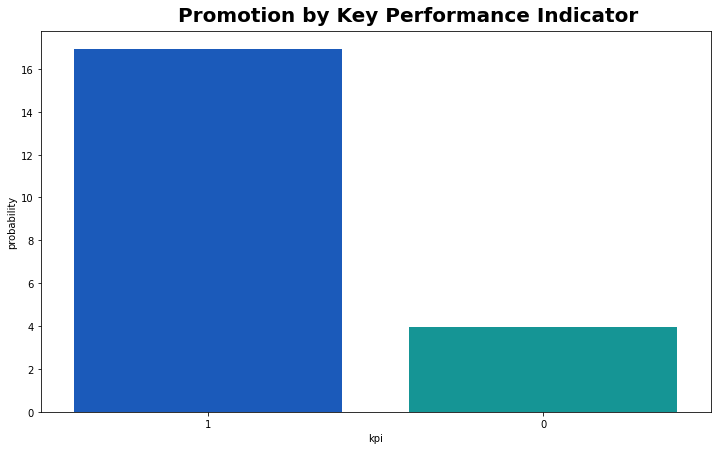

In [13]:
fig, (ax1) = plt.subplots(figsize=(12,7))
sns.barplot(x='kpi', y='probability', 
                data=kpi,ax=ax1,palette='winter',
               order=kpi.sort_values('probability',ascending = False).kpi)
title = '''Promotion by Key Performance Indicator'''
fig.text(x=0.55, y=0.9, s=title, fontsize=20, weight='bold', ha='center')
plt.tight_layout
# plt.savefig('kpi.png')

Employee yang mencapai KPI diatas 80% mendapatkan 16.91% untuk dipromosikan dibandingkan dengan yang tidak dengan persentase 3.96%

##### Probabilitas di promosikan berdasarkan `department`

In [14]:
df_department = pd.pivot_table(df,
                    index = ['department'],
                    columns = ['is_promoted'],
                    aggfunc = {'is_promoted' : ['count']}).reset_index()
df_department.columns = ['department', 'not_promoted', 'promoted']
df_department['total'] = df_department['not_promoted']+df_department['promoted']
df_department['probability'] = round((df_department['promoted']/df_department['total'])*100,2)
df_department = df_department.sort_values(['probability'], ascending=False)
df_department

,department,not_promoted,promoted,total,probability
8,Technology,6370,768,7138,10.76
5,Procurement,6450,688,7138,9.64
0,Analytics,4840,512,5352,9.57
4,Operations,10325,1023,11348,9.01
1,Finance,2330,206,2536,8.12
7,Sales & Marketing,15627,1213,16840,7.20
6,R&D,930,69,999,6.91
2,HR,2282,136,2418,5.62
3,Legal,986,53,1039,5.10


<function matplotlib.pyplot.tight_layout(pad=1.08, h_pad=None, w_pad=None, rect=None)>

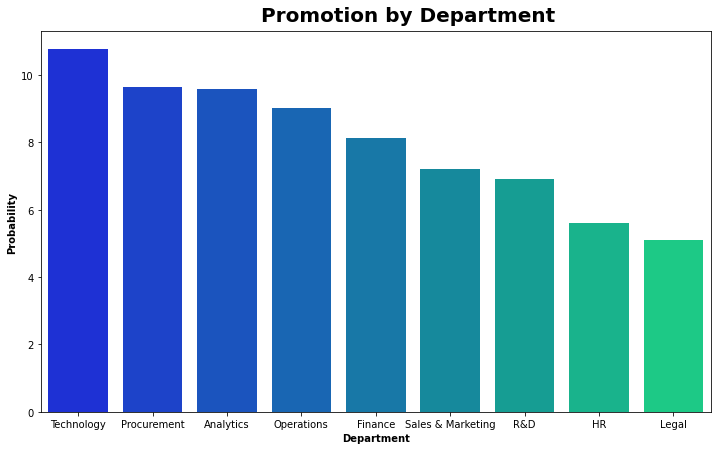

In [15]:
fig, (ax1) = plt.subplots(figsize=(12,7))
sns.barplot(x='department', y='probability', 
                data=df_department,ax=ax1,palette='winter',
               order=df_department.sort_values('probability',ascending = False).department)
title = '''Promotion by Department'''
fig.text(x=0.55, y=0.9, s=title, fontsize=20, weight='bold', ha='center')
plt.xlabel('Department', fontsize = 10, weight='bold')
plt.ylabel('Probability', fontsize = 10, weight='bold')

plt.tight_layout
# plt.savefig('department.png')

Employee dari departement teknologi mendapatkan chance tertinggi untuk dipromosikan dengan persentase 10.76%, sedangkan yang paling kecil adalah dari bagian legal dengan persentase 5.10%

##### Probabilitas di promosikan berdasarkan `education`

In [16]:
prob_edu = df.groupby(['education','is_promoted'])['employee_id'].count().reset_index()
edu = prob_edu.pivot_table(index='education', columns='is_promoted', 
                       values='employee_id').reset_index()
edu.columns = ['education', 'not_promoted', 'promoted']
edu['total'] = edu['not_promoted']+edu['promoted']
edu['probability'] = round((edu['promoted']/edu['total'])*100,2)
edu = edu.sort_values(['probability'], ascending=False)
edu

,education,not_promoted,promoted,total,probability
2,Master's & above,13454,1471,14925,9.86
1,Below Secondary,738,67,805,8.32
0,Bachelor's,33661,3008,36669,8.20


<function matplotlib.pyplot.tight_layout(pad=1.08, h_pad=None, w_pad=None, rect=None)>

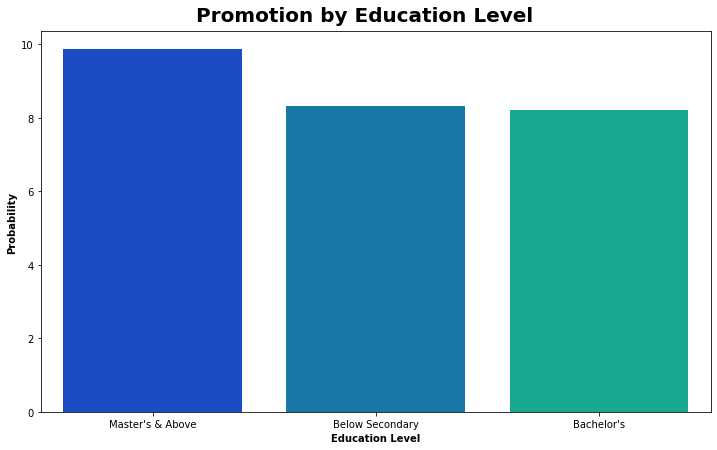

In [17]:
fig, (ax1) = plt.subplots(figsize=(12,7))
sns.barplot(x='education', y='probability', 
                data=edu,ax=ax1,palette='winter',
               order=edu.sort_values('probability',ascending = False).education)

title = '''Promotion by Education Level'''
fig.text(x=0.5, y=0.9, s=title, fontsize=20, weight='bold', ha='center')

plt.xlabel('Education Level', fontsize = 10, weight='bold')
plt.ylabel('Probability', fontsize = 10, weight='bold')
ax1.set_xticklabels(["Master's & Above", 'Below Secondary', "Bachelor's"], fontsize = 10)

plt.tight_layout
# plt.savefig('education.png')

Employees dengan level edukasi master
and above memiliki chance dipromosikan dengan persentase 9.86%

In [18]:
prob_gender = df.groupby(['gender','is_promoted'])['employee_id'].count().reset_index()
gender = prob_gender.pivot_table(index='gender', columns='is_promoted', 
                       values='employee_id').reset_index()
gender.columns = ['gender', 'not_promoted', 'promoted']
gender['total'] = gender['not_promoted']+gender['promoted']
gender['probability'] = round((gender['promoted']/gender['total'])*100,2)
gender = gender.sort_values(['probability'], ascending=False)
gender

,gender,not_promoted,promoted,total,probability
0,f,14845,1467,16312,8.99
1,m,35295,3201,38496,8.32


<function matplotlib.pyplot.tight_layout(pad=1.08, h_pad=None, w_pad=None, rect=None)>

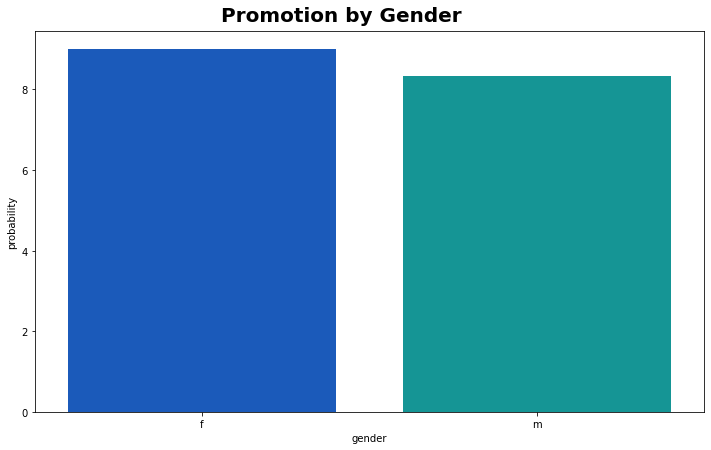

In [19]:
fig, (ax1) = plt.subplots(figsize=(12,7))
sns.barplot(x='gender', y='probability', 
                data=gender,ax=ax1,palette='winter',
               order=gender.sort_values('probability',ascending = False).gender)
title = '''Promotion by Gender'''
fig.text(x=0.48, y=0.9, s=title, fontsize=20, weight='bold', ha='center')
plt.tight_layout
# plt.savefig('gender.png')

Employee perempuan mendapatkan lebih tinggi probabilitas dibanding male dengan persentase 8.99%

In [20]:
rating_probs = df.groupby(['previous_year_rating','is_promoted']).agg({
    'department': ['count']
}).reset_index()

rating_probs.columns = ['previous_year_rating', 'is_promoted', "employees"]

rating_probs = pd.pivot_table(rating_probs,
                              index = 'previous_year_rating',
                              columns = 'is_promoted',
                              values = "employees"
                             ).reset_index()

rating_probs.columns = ['previous_year_rating', 'not_promoted', 'promoted']
rating_probs['total_employees'] = rating_probs['not_promoted'] + rating_probs['promoted']
rating_probs['promotion_probs'] = (rating_probs['promoted']/(rating_probs['not_promoted']+rating_probs['promoted']))*100
rating_probs = rating_probs.sort_values('promotion_probs', ascending=False).reset_index(drop=True)
rating_probs

,previous_year_rating,not_promoted,promoted,total_employees,promotion_probs
0,5.0,9820,1921,11741,16.361468
1,4.0,9093,784,9877,7.937633
2,3.0,17263,1355,18618,7.277903
3,2.0,4044,181,4225,4.284024
4,1.0,6135,88,6223,1.414109


<function matplotlib.pyplot.tight_layout(pad=1.08, h_pad=None, w_pad=None, rect=None)>

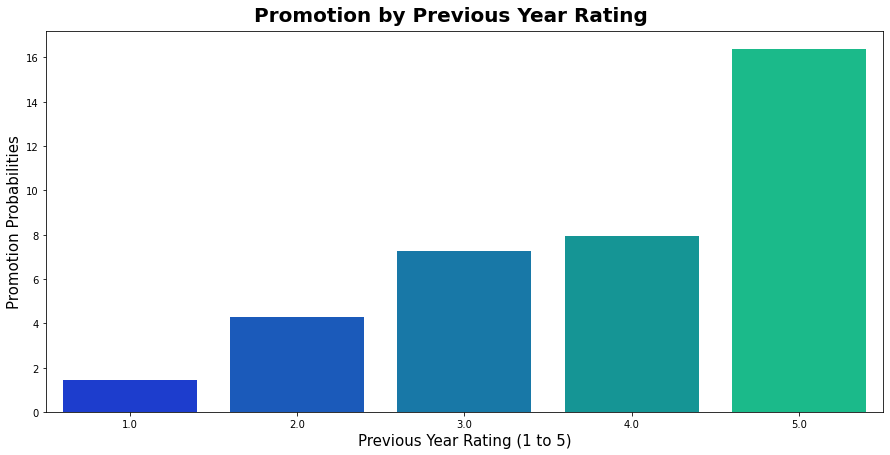

In [21]:
fig, ax = plt.subplots(figsize=(15,7))

sns.barplot(x='previous_year_rating', y='promotion_probs', data=rating_probs,
                order=rating_probs.sort_values('promotion_probs')['previous_year_rating'],
                palette = 'winter')

title = '''Promotion by Previous Year Rating'''
plt.xlabel('Previous Year Rating (1 to 5)', fontsize = 15) 
plt.ylabel('Promotion Probabilities', fontsize = 15) 

fig.text(x=0.5, y=0.9, s=title, fontsize=20, weight='bold', ha='center')
plt.tight_layout
# plt.savefig('rating.png')

Nilai Rating Tahun Sebelumnya mempunyai faktor penting dalam penentuan karyawan mendapatkan promosi kenaikan 
jabatan atau tidak, terlihat pada grafis, mempunyai pola yang terus meningkat sehingga karyawan dengan nilai
lebih tinggi mempunyai presentase dipromosikan lebih besar.

In [22]:
prob_los = df.groupby(['length_of_service','is_promoted'])['employee_id'].count().reset_index()
los = prob_los.pivot_table(index='length_of_service', columns='is_promoted', 
                       values='employee_id').reset_index()
los.columns = ['length_of_service', 'not_promoted', 'promoted']
los['promoted'] = los['promoted'].fillna(0)
los['total'] = los['not_promoted']+los['promoted']
los['probability'] = round((los['promoted']/los['total'])*100,2)
los = los.sort_values(['probability'], ascending=False)
los.head()

,length_of_service,not_promoted,promoted,total,probability
33,34,3.0,1.0,4.0,25.00
31,32,8.0,2.0,10.0,20.00
22,23,58.0,7.0,65.0,10.77
10,11,820.0,96.0,916.0,10.48
28,29,27.0,3.0,30.0,10.00


<function matplotlib.pyplot.tight_layout(pad=1.08, h_pad=None, w_pad=None, rect=None)>

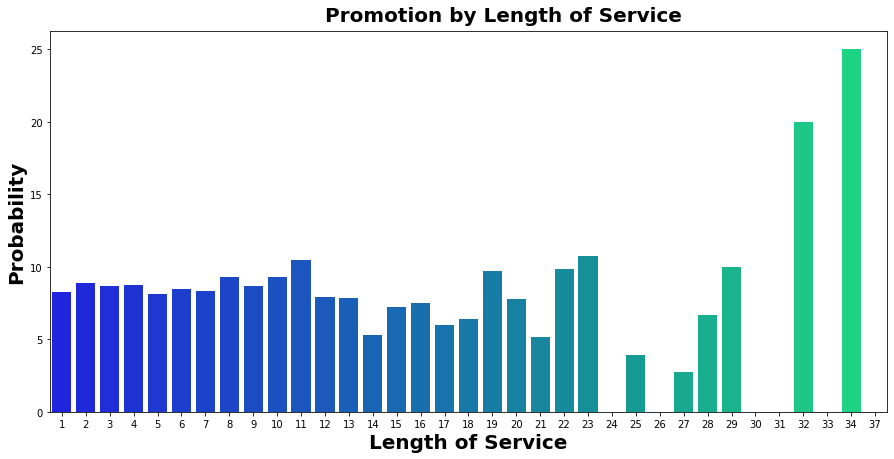

In [23]:
fig, (ax1) = plt.subplots(figsize=(15,7))
sns.barplot(x='length_of_service', y='probability', 
                data=los,ax=ax1,palette='winter',
               order=los.sort_values('length_of_service').length_of_service)


title = '''Promotion by Length of Service'''
fig.text(x=0.38, y=0.9, s=title, fontsize=20, weight='bold')

plt.xlabel('Length of Service', fontsize = 20, weight='bold')
plt.ylabel('Probability', fontsize = 20, weight='bold')

plt.tight_layout
# plt.savefig('los.png')

Lamanya karyawan bekerja di MNC tidak begitu memiliki pengaruh dalam penentuan promosi pada Karyawan, dapat dilihat 
pada grafis dibawah, bila dilihat secara keseluruhan karyawan dengan bekerja selama 1 tahun sampai 11 tahun, memiliki
perbedaan presentasi yang sedikit. Dari 12 sampai 34 tahun pun memiliki pola yang tidak beraturan.

In [24]:
region_probs = df.groupby(['region', 'is_promoted']).agg({
    'department': ['count']
}).reset_index()

region_probs.columns = ['region', 'is_promoted','employees']

region_probs = pd.pivot_table(region_probs,
                             index = 'region',
                             columns = 'is_promoted',
                             values = 'employees').reset_index()

region_probs.columns = ['region','not_promoted','promoted']
region_probs['promotion_probs'] = (region_probs['promoted']/(region_probs['not_promoted']+region_probs['promoted']))*100
region_probs = region_probs.sort_values('promotion_probs', ascending=False).reset_index(drop=True)
region_probs.head()

,region,not_promoted,promoted,promotion_probs
0,region_4,1457,246,14.445097
1,region_17,687,109,13.693467
2,region_25,716,103,12.576313
3,region_28,1164,154,11.684370
4,region_23,1038,137,11.659574


<function matplotlib.pyplot.tight_layout(pad=1.08, h_pad=None, w_pad=None, rect=None)>

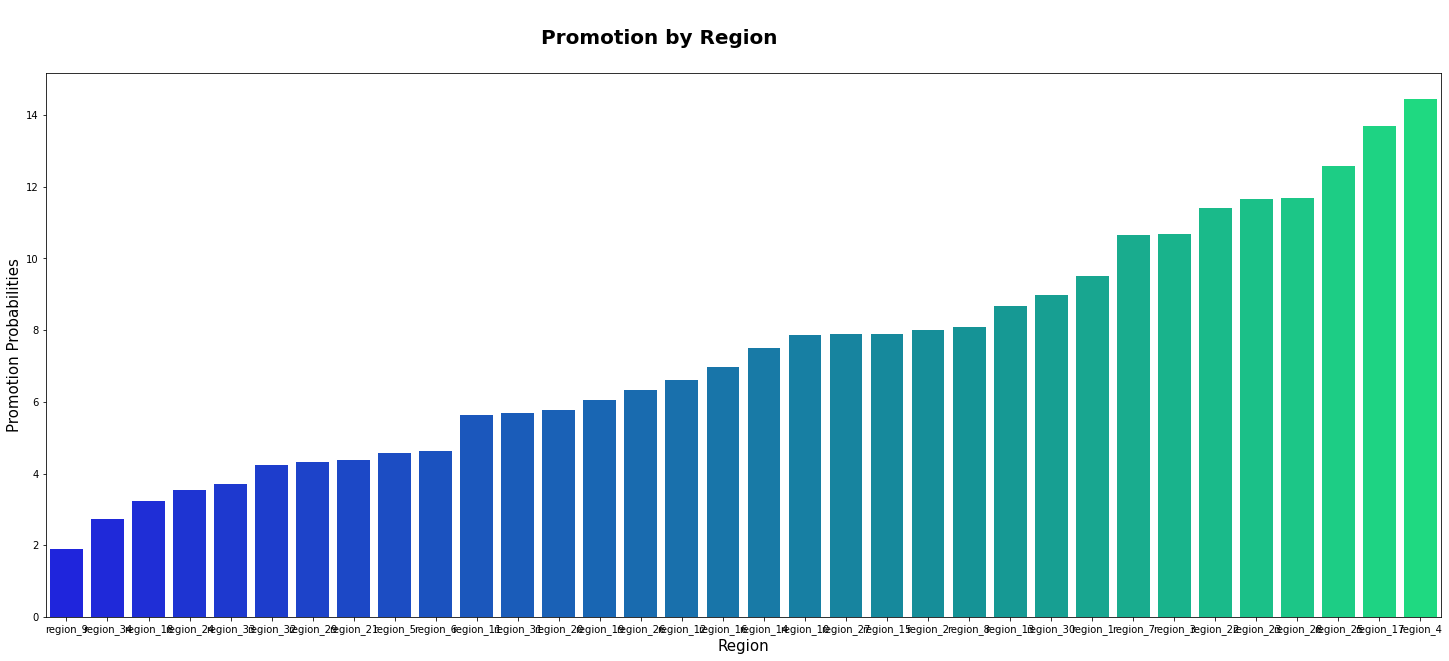

In [25]:
fig, ax = plt.subplots(figsize=(25,10))

sns.barplot(x='region', y='promotion_probs', data=region_probs,
                order=region_probs.sort_values('promotion_probs')['region'],
                palette = 'winter')
title = '''
Promotion by Region
'''
fig.text(x=0.4, y=0.89, s=title, fontsize=20, weight='bold')

plt.xlabel('Region', fontsize = 15) 
plt.ylabel('Promotion Probabilities', fontsize = 15) 

plt.tight_layout
# plt.savefig('region.png')

Dari data region, employee yang mempunyai peluang besar untuk dipromosikan berada di region 4, 17, 25, 28, 23, 22, 3, 7  dengan probabilty > 10%

In [26]:
nof_probs = df.groupby(['no_of_trainings', 'is_promoted']).agg({
    'department': ['count']
}).reset_index()

nof_probs.columns = ['no_of_trainings', 'is_promoted','employees']

nof_probs = pd.pivot_table(nof_probs,
                             index = 'no_of_trainings',
                             columns = 'is_promoted',
                             values = 'employees').reset_index()

nof_probs.columns = ['no_of_trainings','not_promoted','promoted']
nof_probs['total_employees'] = nof_probs['not_promoted'] + nof_probs['promoted']
nof_probs['promotion_probs'] = (nof_probs['promoted']/(nof_probs['not_promoted']+nof_probs['promoted']))*100
nof_probs = nof_probs.sort_values('promotion_probs', ascending=False).reset_index(drop=True)
nof_probs

,no_of_trainings,not_promoted,promoted,total_employees,promotion_probs
0,1,40468.0,3910.0,44378.0,8.810672
1,2,7382.0,605.0,7987.0,7.574809
2,3,1654.0,122.0,1776.0,6.869369
3,4,442.0,26.0,468.0,5.555556
4,6,42.0,2.0,44.0,4.545455
5,5,125.0,3.0,128.0,2.343750
6,7,12.0,NaN,NaN,NaN
7,8,5.0,NaN,NaN,NaN
8,9,5.0,NaN,NaN,NaN
9,10,5.0,NaN,NaN,NaN


In [27]:
nof_probs.dropna(inplace = True)

<function matplotlib.pyplot.tight_layout(pad=1.08, h_pad=None, w_pad=None, rect=None)>

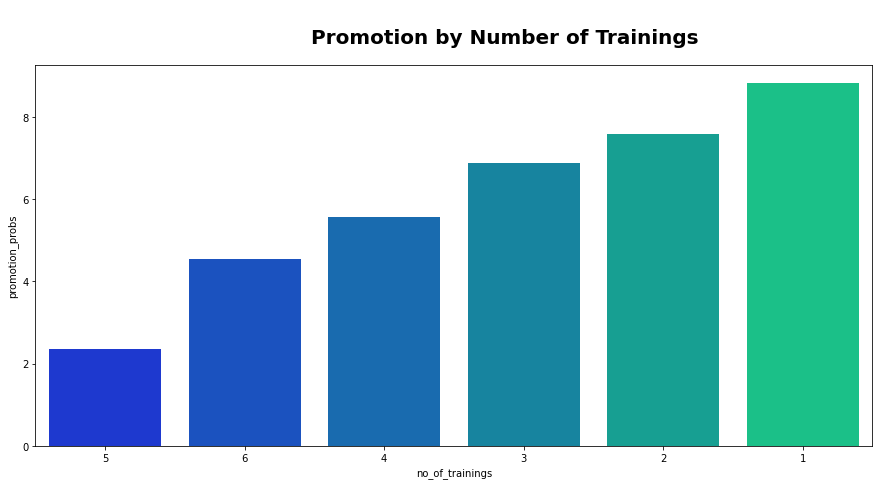

In [28]:
fig, ax = plt.subplots(figsize=(15,7))

sns.barplot(x='no_of_trainings', y='promotion_probs', data=nof_probs,
                order=nof_probs.sort_values('promotion_probs')['no_of_trainings'],
                palette='winter')
title = '''
Promotion by Number of Trainings
'''
fig.text(x=0.38, y=0.88, s=title, fontsize=20, weight='bold')

plt.tight_layout
# plt.savefig('nof.png')

Employee yang mengikuti traning 1 kali memiliki tingkat dipromosikan paling tinggi

In [29]:
prob_avg = df.groupby(['avg_training_score','is_promoted'])['employee_id'].count().reset_index()
avg = prob_avg.pivot_table(index='avg_training_score', columns='is_promoted', 
                       values='employee_id').reset_index()
avg.columns = ['avg_training_score', 'not_promoted', 'promoted']
avg['not_promoted'] = avg['not_promoted'].fillna(0)
avg['promoted'] = avg['promoted'].fillna(0)
avg['total'] = avg['not_promoted']+avg['promoted']
avg['probability'] = round((avg['promoted']/avg['total'])*100,2)
avg = avg.sort_values(['probability'],ascending=True).tail(20)
avg

,avg_training_score,not_promoted,promoted,total,probability
25,64,627.0,81.0,708.0,11.44
31,70,932.0,123.0,1055.0,11.66
33,72,639.0,86.0,725.0,11.86
32,71,790.0,108.0,898.0,12.03
36,75,354.0,49.0,403.0,12.16
48,87,571.0,84.0,655.0,12.82
47,86,792.0,120.0,912.0,13.16
35,74,359.0,74.0,433.0,17.09
49,88,362.0,82.0,444.0,18.47
50,89,217.0,84.0,301.0,27.91


<function matplotlib.pyplot.tight_layout(pad=1.08, h_pad=None, w_pad=None, rect=None)>

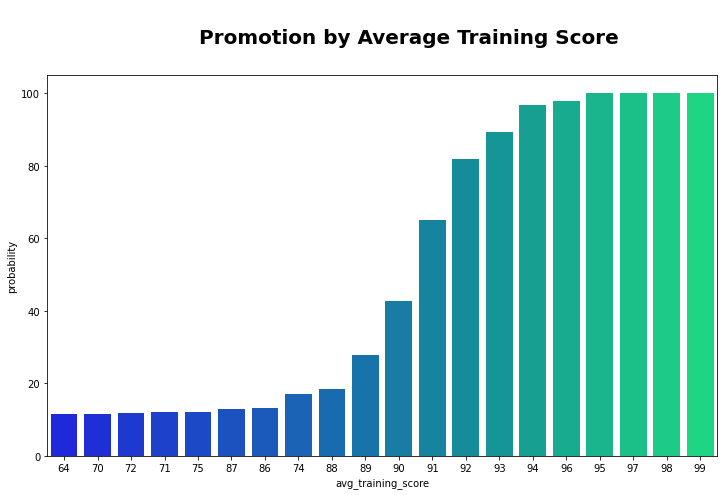

In [30]:
fig, ax = plt.subplots(figsize=(12,7))


sns.barplot(x='avg_training_score', y='probability', data=avg,
                order=avg.sort_values('probability')['avg_training_score'],
                palette='winter')
title = '''
Promotion by Average Training Score
'''
fig.text(x=0.3, y=0.9, s=title, fontsize=20, weight='bold')

plt.tight_layout
# plt.savefig('avg.png')

Rata - rata nilai training test mempunyai pengaruh cukup signifikan dalam promosi kenaikan jabatan, terlihat 
dari grafis, karyawan yang mempunyai rata - rata nilai training test mulai dari 88 sampai 99, memiliki presentase 
kenaikan jabatan yang terus meningkat.

## Data Cleansing & Preprocessing

* 0 = Not Promoted
* 1 = Is Promoted

        - TN: employee tidak mendapatkan promosi
        - TP: employee mendapatkan promosi
        - FP: employee diprediksi mendapatkan promosi , padahal sebenarnya/realisasinya employee tidak dipromosikan.
        - FN: employee diprediksi tidak mendapatkan promosi, padahal sebenernya/realisasinya employee diprekdisi dipromosikan
        
Tindakan:
* FP: Salah prediksi, team HR dianggap tidak kompeten karena melakukan prediksi yang salah (precision) 
* FN: Salah prediksi, team HR dapat dianggap lalai karena tidak melakukan promosi kepada employee, sehingga menyebabkan employee yang berkompeten dapat resign terlebih dahulu, dan team HR dapat disalahkan oleh beberapa department, karena tidak mempromosikan karyawan yang diprediksi akan dipromosikan (recall)

- > Yang akan di tekan adalah FN, untuk meminimalisir kesalahan HR dalam prediksi promosi karyawan

In [31]:
df_model = df.copy()
df_model = df_model.drop('employee_id',axis = 1)
df_model.sample()

,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
37550,Technology,region_2,Bachelor's,f,other,1,50,3.0,19,0,0,76,0


In [32]:
df_model.is_promoted.value_counts()

0    50140
1     4668
Name: is_promoted, dtype: int64

In [33]:
df_model.isna().sum()

department                 0
region                     0
education               2409
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    4124
length_of_service          0
KPIs_met >80%              0
awards_won?                0
avg_training_score         0
is_promoted                0
dtype: int64

In [34]:
# PreProcessing
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder,RobustScaler
import category_encoders as ce
from category_encoders import BinaryEncoder
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

## *Preprocessing Scheme*

- BinaryEncode : `department`,`region`,`recruitment_channel`
- OneHotEncode: `education`, `gender`
- Handling Missing Value: `education` --> Modus, `previous_year_rating` --> Median
- Data yang di passthrough --> `gender`, `KPIs_met >80%` , `awards_won?`

In [35]:
mode_onehot_pipe = Pipeline([
    ('encoder', SimpleImputer(strategy = 'most_frequent')),
    ('one hot encoder', OneHotEncoder(handle_unknown = 'ignore'))
])

In [36]:
binary_pipe = Pipeline([('encoder',SimpleImputer(strategy='most_frequent')),
                  ('binary encoder',ce.BinaryEncoder())
                       ])

In [37]:
median_imp = Pipeline([
    ('impute', SimpleImputer(strategy = 'median')),
    ('scaling', RobustScaler())
])

In [38]:
transformer = ColumnTransformer([
    ('binary',binary_pipe,['region']),
    ('mode_onehot_pipe',mode_onehot_pipe,['education', 'gender','recruitment_channel','department']),
    ('median imputer',median_imp,['previous_year_rating']),
    ('scaler',RobustScaler(),['age','length_of_service','avg_training_score','no_of_trainings'])
    ],remainder='passthrough')

In [39]:
df_model['is_promoted'].value_counts()/df_model.shape[0]*100

0    91.482995
1     8.517005
Name: is_promoted, dtype: float64

> ### *Splitting Data*

In [40]:
# Splitting Data
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score

In [41]:
X = df_model.drop('is_promoted', axis = 1)
y = df_model['is_promoted']

In [42]:
X.shape

(54808, 12)

In [43]:
X_train,X_test,y_train,y_test=train_test_split(
    X,y,stratify=y,
    test_size=0.3,
    random_state=1212)

> ### Modelling

In [44]:
# Modeling, Fitting and Evaluation
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, precision_score, plot_precision_recall_curve, f1_score,recall_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.ensemble import RandomForestClassifier

In [45]:
logreg = LogisticRegression()
tree = DecisionTreeClassifier(random_state = 1212)
knn = KNeighborsClassifier()
rf = RandomForestClassifier(random_state = 1212)

In [46]:
logreg_pipe = Pipeline([('transformer', transformer), ('logreg', logreg)])
tree_pipe = Pipeline([('transformer', transformer), ('tree', tree)])
knn_pipe = Pipeline([('transformer', transformer), ('knn', knn)])
rf_pipe = Pipeline([('transformer', transformer), ('rf', rf)])

def model_evaluation(model, metric):
    skfold = StratifiedKFold(n_splits = 5)
    model_cv = cross_val_score(model, X_train, y_train, cv = skfold, scoring = metric)
    return model_cv

logreg_pipe_cv = model_evaluation(logreg_pipe, 'recall')
tree_pipe_cv = model_evaluation(tree_pipe, 'recall')
knn_pipe_cv = model_evaluation(knn_pipe, 'recall')
rf_pipe_cv = model_evaluation(rf_pipe, 'recall')

for model in [logreg_pipe, tree_pipe, knn_pipe, rf_pipe]:
    model.fit(X_train, y_train)
    
score_mean = [logreg_pipe_cv.mean(), tree_pipe_cv.mean(), knn_pipe_cv.mean(), rf_pipe_cv.mean()]
score_std = [logreg_pipe_cv.std(), tree_pipe_cv.std(), knn_pipe_cv.std(), rf_pipe_cv.std()]
score_recall_score = [recall_score(y_test, logreg_pipe.predict(X_test)),
            recall_score(y_test, tree_pipe.predict(X_test)), 
            recall_score(y_test, knn_pipe.predict(X_test)), 
            recall_score(y_test, rf_pipe.predict(X_test))]
method_name = ['Logistic Regression', 'Decision Tree Classifier', 'KNN Classifier', 'Random Forest Classifier']
cv_summary = pd.DataFrame({
    'method': method_name,
    'mean score': score_mean,
    'std score': score_std,
    'recall score': score_recall_score
})
cv_summary

,method,mean score,std score,recall score
0,Logistic Regression,0.252442,0.017606,0.253571
1,Decision Tree Classifier,0.460522,0.021007,0.457857
2,KNN Classifier,0.071908,0.009722,0.072143
3,Random Forest Classifier,0.263157,0.006596,0.270000


In [47]:
rf_pipe.fit(X_train,y_train)
print(classification_report(y_test,rf_pipe.predict(X_test)))

              precision    recall  f1-score   support

           0       0.94      0.99      0.96     15043
           1       0.80      0.27      0.40      1400

    accuracy                           0.93     16443
   macro avg       0.87      0.63      0.68     16443
weighted avg       0.92      0.93      0.92     16443



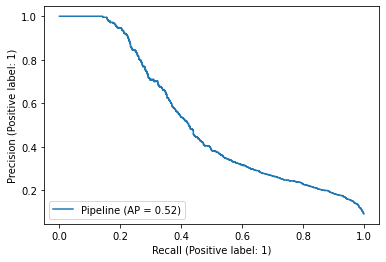

In [48]:
plot_precision_recall_curve(logreg_pipe,X_test,y_test)

In [49]:
# Resampling
from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline

In [50]:
rus = RandomUnderSampler(random_state = 1212)

logreg_pipe_under = Pipeline([('transformer', transformer), ('rus', rus), ('logreg', logreg)])
tree_pipe_under = Pipeline([('transformer', transformer), ('rus', rus), ('tree', tree)])
knn_pipe_under = Pipeline([('transformer', transformer), ('rus', rus), ('knn', knn)])
rf_pipe_under = Pipeline([('transformer', transformer), ('rus', rus), ('rf', rf)])

def model_evaluation(model, metric):
    skfold = StratifiedKFold(n_splits = 5)
    model_cv = cross_val_score(model, X_train, y_train, cv = skfold, scoring = metric)
    return model_cv

logreg_under_cv = model_evaluation(logreg_pipe_under, 'recall') 
tree_under_cv = model_evaluation(tree_pipe_under, 'recall')
knn_under_cv = model_evaluation(knn_pipe_under, 'recall')
rf_under_cv = model_evaluation(rf_pipe_under, 'recall')

for model in [logreg_pipe_under, tree_pipe_under, knn_pipe_under, rf_pipe_under]:
    model.fit(X_train, y_train)
    
score_mean = [logreg_under_cv.mean(), tree_under_cv.mean(), knn_under_cv.mean(),
              rf_under_cv.mean()]
score_std = [logreg_under_cv.std(), tree_under_cv.std(), knn_under_cv.std(),
             rf_under_cv.std()]
score_recall_score = [recall_score(y_test, logreg_pipe_under.predict(X_test)),
            recall_score(y_test, tree_pipe_under.predict(X_test)), 
            recall_score(y_test, knn_pipe_under.predict(X_test)), 
            recall_score(y_test, rf_pipe_under.predict(X_test))]
method_name = ['Logistic Regression UnderSampling', 'Decision Tree Classifier UnderSampling',
              'KNN Classifier UnderSampling', 'Random Forest Classifier UnderSampling']
under_summary = pd.DataFrame({
    'method': method_name,
    'mean score': score_mean,
    'std score': score_std,
    'recall score': score_recall_score
})
under_summary

,method,mean score,std score,recall score
0,Logistic Regression UnderSampling,0.815178,0.008460,0.801429
1,Decision Tree Classifier UnderSampling,0.753366,0.005891,0.757143
2,KNN Classifier UnderSampling,0.698288,0.015731,0.683571
3,Random Forest Classifier UnderSampling,0.848230,0.017329,0.856429


In [51]:
rf_pipe_under.fit(X_train,y_train)
print(classification_report(y_test,rf_pipe_under.predict(X_test)))

              precision    recall  f1-score   support

           0       0.98      0.73      0.84     15043
           1       0.23      0.86      0.36      1400

    accuracy                           0.74     16443
   macro avg       0.61      0.79      0.60     16443
weighted avg       0.92      0.74      0.80     16443



In [52]:
logreg_pipe_under.score(X_train,y_train)

0.7658542942786394

In [53]:
logreg_pipe_under.score(X_test,y_test)

0.7623304749741532

In [54]:
rf_pipe_under.score(X_train,y_train)

0.7834223901994005

In [55]:
rf_pipe_under.score(X_test,y_test)

0.7432950191570882

In [56]:
ros = RandomOverSampler(random_state = 1212) 

logreg_pipe_over = Pipeline([('transformer', transformer), ('ros', ros), ('logreg', logreg)])
tree_pipe_over = Pipeline([('transformer', transformer), ('ros', ros), ('tree', tree)])
knn_pipe_over = Pipeline([('transformer', transformer), ('ros', ros), ('knn', knn)])
rf_pipe_over = Pipeline([('transformer', transformer), ('ros', ros), ('rf', rf)])

def model_evaluation(model, metric):
    skfold = StratifiedKFold(n_splits = 5)
    model_cv = cross_val_score(model, X_train, y_train, cv = skfold, scoring = metric)
    return model_cv

logreg_over_cv = model_evaluation(logreg_pipe_over, 'recall') 
tree_over_cv = model_evaluation(tree_pipe_over, 'recall')
knn_over_cv = model_evaluation(knn_pipe_over, 'recall')
rf_over_cv = model_evaluation(rf_pipe_over, 'recall')

for model in [logreg_pipe_over, tree_pipe_over, knn_pipe_over, rf_pipe_over]:
    model.fit(X_train, y_train)
    
score_mean = [logreg_over_cv.mean(), tree_over_cv.mean(), knn_over_cv.mean(),
              rf_over_cv.mean()]
score_std = [logreg_over_cv.std(), tree_over_cv.std(), knn_over_cv.std(),
             rf_over_cv.std()]
score_recall_score = [recall_score(y_test, logreg_pipe_over.predict(X_test)),
            recall_score(y_test, tree_pipe_over.predict(X_test)), 
            recall_score(y_test, knn_pipe_over.predict(X_test)), 
            recall_score(y_test, rf_pipe_over.predict(X_test))]
method_name = ['Logistic Regression OverSampling', 'Decision Tree Classifier OverSampling',
              'KNN Classifier OverSampling', 'Random Forest Classifier OverSampling']
over_summary = pd.DataFrame({
    'method': method_name,
    'mean score': score_mean,
    'std score': score_std,
    'recall score': score_recall_score
})
over_summary

,method,mean score,std score,recall score
0,Logistic Regression OverSampling,0.819455,0.008403,0.801429
1,Decision Tree Classifier OverSampling,0.419517,0.013540,0.425714
2,KNN Classifier OverSampling,0.421059,0.017370,0.430714
3,Random Forest Classifier OverSampling,0.343323,0.011046,0.357143


In [57]:
rf_pipe_over.fit(X_train,y_train)
print(classification_report(y_test,rf_pipe_over.predict(X_test)))

              precision    recall  f1-score   support

           0       0.94      0.98      0.96     15043
           1       0.62      0.36      0.45      1400

    accuracy                           0.93     16443
   macro avg       0.78      0.67      0.71     16443
weighted avg       0.92      0.93      0.92     16443



In [58]:
logreg_pipe_over.score(X_train,y_train)

0.7679134627916069

In [59]:
logreg_pipe_over.score(X_test,y_test)

0.7644590403211093

In [60]:
smote = SMOTE(random_state = 1212)
logreg_pipe_scale_smote = Pipeline([
    ('transformer', transformer),
    ('smote', smote),
    ('logreg', logreg)
])

tree_pipe_scale_smote = Pipeline([
    ('transformer', transformer),
    ('smote', smote),
    ('tree', tree)
])

knn_pipe_scale_smote = Pipeline([
    ('transformer', transformer),
    ('smote', smote),
    ('knn', knn)
])

rf_pipe_scale_smote = Pipeline([
    ('transformer', transformer),
    ('smote', smote),
    ('rf', rf)
])

In [61]:
def model_evaluation(model, metric):
    skfold = StratifiedKFold(n_splits = 5)
    model_cv = cross_val_score(model, X_train, y_train, cv = skfold, scoring = metric)
    return model_cv

logreg_scale_smote_cv = model_evaluation(logreg_pipe_scale_smote, 'recall') 
tree_scale_smote_cv = model_evaluation(tree_pipe_scale_smote, 'recall')
knn_pipe_smote_cv = model_evaluation(knn_pipe_scale_smote, 'recall')
rf_pipe_smote_cv = model_evaluation(rf_pipe_scale_smote, 'recall')

for model in [logreg_pipe_scale_smote, tree_pipe_scale_smote, knn_pipe_scale_smote, rf_pipe_scale_smote]:
    model.fit(X_train, y_train)
    
score_mean = [logreg_scale_smote_cv.mean(), tree_scale_smote_cv.mean(), knn_pipe_smote_cv.mean(),
              rf_pipe_smote_cv.mean()]
score_std = [logreg_scale_smote_cv.std(), tree_scale_smote_cv.std(), knn_pipe_smote_cv.std(),
             rf_pipe_smote_cv.std()]
score_recall_score = [recall_score(y_test, logreg_pipe_scale_smote.predict(X_test)),
            recall_score(y_test, tree_pipe_scale_smote.predict(X_test)), 
            recall_score(y_test, knn_pipe_scale_smote.predict(X_test)), 
            recall_score(y_test, rf_pipe_scale_smote.predict(X_test))]
method_name = ['Logistic Regression SMOTE', 'Decision Tree Classifier SMOTE',
              'KNN Classifier SMOTE', 'Random Forest Classifier SMOTE']
smote_summary = pd.DataFrame({
    'method': method_name,
    'mean score': score_mean,
    'std score': score_std,
    'recall score': score_recall_score
})
smote_summary    
    

,method,mean score,std score,recall score
0,Logistic Regression SMOTE,0.802623,0.012640,0.785000
1,Decision Tree Classifier SMOTE,0.470315,0.020892,0.445000
2,KNN Classifier SMOTE,0.477057,0.014927,0.489286
3,Random Forest Classifier SMOTE,0.349751,0.010400,0.360714


In [62]:
rf_pipe_scale_smote.fit(X_train,y_train)
print(classification_report(y_test,rf_pipe_scale_smote.predict(X_test)))

              precision    recall  f1-score   support

           0       0.94      0.97      0.96     15043
           1       0.57      0.36      0.44      1400

    accuracy                           0.92     16443
   macro avg       0.75      0.67      0.70     16443
weighted avg       0.91      0.92      0.91     16443



In [63]:
# Boosting
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from xgboost.sklearn import XGBClassifier

In [64]:
adaboost = AdaBoostClassifier(
            tree,
            n_estimators = 50,
            learning_rate = 0.1,
            random_state = 1212)


pipe_ada = Pipeline([
    ('transformer', transformer),
    ('adaboost', adaboost)
])

gradboost = GradientBoostingClassifier(
            n_estimators = 50,
            learning_rate = 0.1,
            max_depth = 3,
            random_state = 1212)

pipe_grad = Pipeline([
    ('transformer', transformer),
    ('gradboost', gradboost)
])

XGBOOST = XGBClassifier(
            n_estimators = 50,
            learning_rate = 0.1,
            max_depth = 3,
            random_state = 1212)

pipe_XGB = Pipeline([
    ('transformer', transformer),
    ('XGBOOST', XGBOOST)
])

In [65]:
def model_evaluation(model, metric):
    skfold = StratifiedKFold(n_splits = 5)
    model_cv = cross_val_score(model, X_train, y_train, cv = skfold, scoring = metric, n_jobs = -1)
    return model_cv

pipe_ada_cv = model_evaluation(pipe_ada, 'recall')
pipe_grad_cv = model_evaluation(pipe_grad, 'recall')
pipe_XGB_cv = model_evaluation(pipe_XGB, 'recall')


for model in [pipe_ada, pipe_grad, pipe_XGB]:
    model.fit(X_train, y_train)
    
score_mean = [pipe_ada_cv.mean(), pipe_grad_cv.mean(), pipe_XGB_cv.mean()]
score_std = [pipe_ada_cv.std(), pipe_grad_cv.std(), pipe_XGB_cv.std()]
score_recall_score = [recall_score(y_test, pipe_ada.predict(X_test)),
            recall_score(y_test, pipe_grad.predict(X_test)), 
            recall_score(y_test, pipe_XGB.predict(X_test))]
method_name = ['Ada Boost Classifier', 'Gradient Boost Classifier',
              'XGB Classifier']
boost_summary = pd.DataFrame({
    'method': method_name,
    'mean score': score_mean,
    'std score': score_std,
    'recall score': score_recall_score
})
boost_summary    

[18:36:52] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


,method,mean score,std score,recall score
0,Ada Boost Classifier,0.423795,0.023405,0.424286
1,Gradient Boost Classifier,0.246318,0.015332,0.237857
2,XGB Classifier,0.207765,0.013348,0.215714


In [66]:
pipe_XGB.fit(X_train,y_train)
print(classification_report(y_test,pipe_XGB.predict(X_test)))

[18:36:57] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
              precision    recall  f1-score   support

           0       0.93      1.00      0.96     15043
           1       0.99      0.22      0.35      1400

    accuracy                           0.93     16443
   macro avg       0.96      0.61      0.66     16443
weighted avg       0.94      0.93      0.91     16443



In [67]:
# estimator = Pipeline([
#     ('transformer', transformer),
#     ('ros', ros),
#     ('model', logreg)
# ])

# hyperparam_space = {
#     'model__C': [100, 10, 1, 0.1, 0.01, 0.001],
#     'model__solver': ['newton-cg', 'lbfgs', 'sag', 'saga'],
#     'model__random_state' : [1212]
# }

# random = RandomizedSearchCV(
#                 estimator,
#                 param_distributions = hyperparam_space,
#                 cv = StratifiedKFold(n_splits = 5),
#                 scoring = 'recall',
#                 n_iter = 10,
#                 n_jobs = -1)

# random.fit(X_train, y_train)

# print('best score', random.best_score_)
# print('best param', random.best_params_)

In [69]:
# random.best_estimator_.fit(X_train,y_train)
# print(classification_report(y_test,random.best_estimator_.predict(X_test)))

In [71]:
estimator = Pipeline([
    ('transformer', transformer),
    ('ros', ros),
    ('model', logreg)
])

hyperparam_space = {
    'model__C': [100, 10, 1, 0.1, 0.01, 0.001],
    'model__solver': ['newton-cg', 'lbfgs', 'sag', 'saga'],
    'model__random_state' : [1212]
}

grid_search = GridSearchCV(
                estimator,
                param_grid = hyperparam_space,
                cv = StratifiedKFold(n_splits = 5),
                scoring = 'recall',
                n_jobs = -1)

grid_search.fit(X_train, y_train)

print('best score', grid_search.best_score_)
print('best param', grid_search.best_params_)

best score 0.8246535631828633
best param {'model__C': 0.1, 'model__random_state': 1212, 'model__solver': 'newton-cg'}


In [72]:
grid_search.fit(X_train,y_train)
print(classification_report(y_test,grid_search.predict(X_test)))

              precision    recall  f1-score   support

           0       0.98      0.76      0.85     15043
           1       0.23      0.80      0.36      1400

    accuracy                           0.76     16443
   macro avg       0.61      0.78      0.61     16443
weighted avg       0.91      0.76      0.81     16443



Dari beberapa percobaan Modelling dan Resampling Data, untuk finalnya saya memilih Modelling Logistic Regression dengan Resampling RandomOverSampler, dan juga dilakukan Hyperparam tuning 

### Deployment

In [75]:
import pickle

In [76]:
grid_search.best_estimator_.fit(X, y)

Pipeline(steps=[('transformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('binary',
                                                  Pipeline(steps=[('encoder',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('binary '
                                                                   'encoder',
                                                                   BinaryEncoder())]),
                                                  ['region']),
                                                 ('mode_onehot_pipe',
                                                  Pipeline(steps=[('encoder',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('one hot '
                     

In [78]:
file_name = 'hr-analytic-grid.sav'

pickle.dump(grid_search.best_estimator_, open(file_name,'wb'))

In [79]:
loaded_model = pickle.load(open(file_name,'rb'))
loaded_model.predict(X_test)

array([1, 1, 0, ..., 0, 1, 0])

In [80]:
df_model.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   department            54808 non-null  object 
 1   region                54808 non-null  object 
 2   education             52399 non-null  object 
 3   gender                54808 non-null  object 
 4   recruitment_channel   54808 non-null  object 
 5   no_of_trainings       54808 non-null  int64  
 6   age                   54808 non-null  int64  
 7   previous_year_rating  50684 non-null  float64
 8   length_of_service     54808 non-null  int64  
 9   KPIs_met >80%         54808 non-null  int64  
 10  awards_won?           54808 non-null  int64  
 11  avg_training_score    54808 non-null  int64  
 12  is_promoted           54808 non-null  int64  
dtypes: float64(1), int64(7), object(5)
memory usage: 5.4+ MB


In [81]:
df_model.no_of_trainings.value_counts()

1     44378
2      7987
3      1776
4       468
5       128
6        44
7        12
10        5
9         5
8         5
Name: no_of_trainings, dtype: int64

### Prediction

In [82]:
hr_pred = pd.DataFrame({
    'department': ['Finance'],
    'region': ['region_4'],
    'education': ["Bachelor's"],
    'gender': ['m'],
    'recruitment_channel': ['sourcing'],
    'no_of_trainings' : [4],
    'age': [35],
    'previous_year_rating': [4.0],
    'length_of_service': [10],
    'KPIs_met >80%': [0],
    'awards_won?': [0],
    'avg_training_score' : [90]
})

In [83]:
hr_pred

,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
0,Finance,region_4,Bachelor's,m,sourcing,4,35,4.0,10,0,0,90


In [84]:
loaded_model.predict(hr_pred)

array([1])

In [85]:
loaded_model.predict_proba(hr_pred)

array([[0.00496655, 0.99503345]])

In [105]:
# df_model[:100].to_html('/Users/rezkydwiseptiyan/Documents/Purwadhika Data Science/Final Project/df_model.html')